In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import html

In [3]:
r = requests.get('http://www.worldometers.info/coronavirus/')
soup = BeautifulSoup(r.text,'lxml')

In [24]:
results = []

for i in soup:
    Column_name = soup.tr.text.strip().replace(',','-').replace('\n',',').split(',')
    Column_name = [e for e in Column_name if e not in ('Continent','1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl','')]
    Column_name[13 : 15] = [''.join(Column_name[13 : 15])]
    

In [224]:
Column_name = soup.tr.text.strip().replace(',','-').replace('\n',',').split(',')

In [225]:
Column_name = [e for e in Column_name if e not in ('Continent','1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl','')]

In [226]:
Column_name[13 : 15] = [''.join(Column_name[13 : 15])] 

In [227]:
Column_name

['#',
 'Country-Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious-Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'Population']

In [37]:
soup.select('a.mt_a')

[<a class="mt_a" href="country/us/">USA</a>,
 <a class="mt_a" href="country/india/">India</a>,
 <a class="mt_a" href="country/brazil/">Brazil</a>,
 <a class="mt_a" href="country/russia/">Russia</a>,
 <a class="mt_a" href="country/uk/">UK</a>,
 <a class="mt_a" href="country/france/">France</a>,
 <a class="mt_a" href="country/turkey/">Turkey</a>,
 <a class="mt_a" href="country/italy/">Italy</a>,
 <a class="mt_a" href="country/spain/">Spain</a>,
 <a class="mt_a" href="country/germany/">Germany</a>,
 <a class="mt_a" href="country/colombia/">Colombia</a>,
 <a class="mt_a" href="country/argentina/">Argentina</a>,
 <a class="mt_a" href="country/mexico/">Mexico</a>,
 <a class="mt_a" href="country/poland/">Poland</a>,
 <a class="mt_a" href="country/iran/">Iran</a>,
 <a class="mt_a" href="country/south-africa/">South Africa</a>,
 <a class="mt_a" href="country/ukraine/">Ukraine</a>,
 <a class="mt_a" href="country/peru/">Peru</a>,
 <a class="mt_a" href="country/netherlands/">Netherlands</a>,
 <a c

In [38]:
re.search('\/\">(.*)<\/a>',)

<re.Match object; span=(33, 37106), match='/">USA</a>, <a class="mt_a" href="country/india/">

In [114]:
list1 = [i.get_text() for i in soup.select('a.mt_a')]

In [115]:
list2 = soup.find_all('table')[0].find_all('td')

In [122]:
list2 = list(list2)

In [124]:
list2 = [str(i) for i in list2]

In [160]:
[s for s in list2 for k in list1 if k in s]

['<td data-continent="Australia/Oceania" style="display:none;">Australia/Oceania</td>',
 '<td data-continent="Australia/Oceania" style="display:none;">Australia/Oceania</td>',
 '<td data-continent="Australia/Oceania" style="display:none;">Australia/Oceania</td>',
 '<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>',
 '<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>',
 '<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>',
 '<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/india/">India</a></td>',
 '<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/india/">India</a></td>',
 '<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/india/">India</a></td>',
 '<td style="font-weight:

In [164]:
[i for i in list2 if 'world-population' in i]
# print([b.index('text3')+1:b.index('text5')])

['<td style="font-weight: bold; text-align:right"><a href="/world-population/us-population/">332,013,304</a> </td>',
 '<td style="font-weight: bold; text-align:right"><a href="/world-population/india-population/">1,387,049,203</a> </td>',
 '<td style="font-weight: bold; text-align:right"><a href="/world-population/brazil-population/">213,345,480</a> </td>',
 '<td style="font-weight: bold; text-align:right"><a href="/world-population/russia-population/">145,967,164</a> </td>',
 '<td style="font-weight: bold; text-align:right"><a href="/world-population/uk-population/">68,071,770</a> </td>',
 '<td style="font-weight: bold; text-align:right"><a href="/world-population/france-population/">65,348,904</a> </td>',
 '<td style="font-weight: bold; text-align:right"><a href="/world-population/turkey-population/">84,809,974</a> </td>',
 '<td style="font-weight: bold; text-align:right"><a href="/world-population/italy-population/">60,415,307</a> </td>',
 '<td style="font-weight: bold; text-align:r

In [228]:
df = pd.DataFrame(index = list1, columns = Column_name)

In [230]:
df.drop(['#', 'Country-Other'], axis=1, inplace=True)

In [284]:
len(list1)

654

In [328]:
df = pd.DataFrame(columns = Column_name)

In [329]:
df[0]

KeyError: 0

In [410]:
# def create_df():
# dct = {}
Countries = []
#     Total_cases = []
#     New_cases = []
#     Total_deaths = []
#     New_deaths = []
#     Total_recovered = []
#     New_recovered = []
#     Active_cases = []
#     Serious_critical = []
#     Per_1m_cases = []
#     Deaths_1m = []
#     Total_tests = []
#     Tests_1m = []
#     Total_population = []
for i, v in enumerate(list2):
    if 'world-population' in v:
        print(''.join([k for s in list2[i-13:i+1][1] for k in s if k.isdigit()]))
#         Total_cases.append(''.join([i for s in list2[ix-13:ix+1][1] for i in s if i.isdigit()]))
#         New_cases.append(''.join([i for s in list2[ix-13:ix+1][2] for i in s if i.isdigit()]))
#         Total_deaths.append(''.join([i for s in list2[ix-13:ix+1][3] for i in s if i.isdigit()]))
#         New_deaths.append(''.join([i for s in list2[ix-13:ix+1][4] for i in s if i.isdigit()]))
#         Total_recovered.append(''.join([i for s in list2[ix-13:ix+1][5] for i in s if i.isdigit()]))
#         New_recovered.append(''.join([i for s in list2[ix-13:ix+1][6] for i in s if i.isdigit()]))
#         Active_cases.append(''.join([i for s in list2[ix-13:ix+1][7] for i in s if i.isdigit()]))
#         Serious_critical.append(''.join([i for s in list2[ix-13:ix+1][8] for i in s if i.isdigit()]))
#         Per_1m_cases.append(''.join([i for s in list2[ix-13:ix+1][9] for i in s if i.isdigit()]))
#         Deaths_1m.append(''.join([i for s in list2[ix-13:ix+1][10] for i in s if i.isdigit()]))
#         Total_tests.append(''.join([i for s in list2[ix-13:ix+1][11] for i in s if i.isdigit()]))
#         Tests_1m.append(''.join([i for s in list2[ix-13:ix+1][12] for i in s if i.isdigit()]))
#         Total_population.append(''.join([i for s in list2[ix-13:ix+1][13] for i in s if i.isdigit()]))
#         df[['Countries','Total_cases','New_cases','Total_deaths','New_deaths','Total_recovered','New_recovered','Active_cases','Serious_critical','Per_1m_cases','Deaths_1m','Total_tests','Tests_1m','Total_population']] = [Countries, Total_cases, New_cases, Total_deaths, New_deaths, Total_recovered, New_recovered, Active_cases, Serious_critical, Per_1m_cases, Deaths_1m, Total_tests, Tests_1m, Total_population]
        

22137009
10414044
7961673
3355794
2889419
2727321
2296102
2220361
2024904
1869306
1737347
1690006
1493569
1365645
1268263
1170590
1105169
1026690
850790
809601
808340
658958
658655
635134
629176
600755
520690
497510
483852
482284
474764
456533
448678
376793
363485
353907
337743
304071
269091
264159
258393
236028
222885
221754
218385
217946
208601
207259
204699
201164
177493
176837
176407
168891
161415
160650
156539
152978
152254
148294
146809
145252
142777
141074
136590
131108
130070
128772
127657
127227
125118
115322
113392
112856
103515
101382
97733
95934
94633
85494
81991
77485
67358
61705
58836
55461
53792
53400
51160
48255
47782
47592
46780
38068
37074
32537
28571
26848
26682
26208
24297
23807
23316
23173
20672
19961
18969
18675
17974
17767
17195
16050
15214
13988
13904
13825
13776
13479
13368
13305
12146
12084
11152
10773
10203
9841
9641
9225
9173
9108
8776
8348
7959
7713
7611
7427
7210
7127
6750
6469
6097
6091
6045
5883
5867
5857
5286
4969
4726
4405
4351
3845
3838
3706
3589
3304

In [507]:
df = pd.DataFrame()

In [405]:
def create_df():
    df = pd.DataFrame()
    df['Countries'] = [''.join([re.findall('>(.*?)<', list2[i-13:i+1][0])[1]]) for i,v in enumerate(list2) if 'world-population' in v]
    df['Total_cases'] = [(''.join([i for s in list2[ix-13:ix+1][1] for i in s if i.isdigit()]))]

In [510]:
df = pd.DataFrame()
Total_cases = []
New_cases = []
Total_deaths = []
New_deaths = []
Total_recovered = []
New_recovered = []
Active_cases = []
Serious_critical = []
Per_1m_cases = []
Deaths_1m = []
Total_tests = []
Tests_1m = []
Total_population = []

for i, v in enumerate(list2):
    if 'world-population' in v:
        df['Countries'] = [''.join([re.findall('>(.*?)<', list2[i-13:i+1][0])[1]]) for i,v in enumerate(list2) if 'world-population' in v]
        Total_cases.append(''.join([k for s in list2[i-13:i+1][1] for k in s if k.isdigit()]))
        New_cases.append(''.join([k for s in list2[i-13:i+1][2] for k in s if k.isdigit()]))
        Total_deaths.append(''.join([k for s in list2[i-13:i+1][3] for k in s if k.isdigit()]))
        New_deaths.append(''.join([k for s in list2[i-13:i+1][4] for k in s if k.isdigit()]))
        Total_recovered.append(''.join([k for s in list2[i-13:i+1][5] for k in s if k.isdigit()]))
        New_recovered.append(''.join([k for s in list2[i-13:i+1][6] for k in s if k.isdigit()]))
        Active_cases.append(''.join([k for s in list2[i-13:i+1][7] for k in s if k.isdigit()]))
        Serious_critical.append(''.join([k for s in list2[i-13:i+1][8] for k in s if k.isdigit()]))
        Per_1m_cases.append(''.join([k for s in list2[i-13:i+1][9] for k in s if k.isdigit()]))
        Deaths_1m.append(''.join([k for s in list2[i-13:i+1][10] for k in s if k.isdigit()]))
        Total_tests.append(''.join([k for s in list2[i-13:i+1][11] for k in s if k.isdigit()]))
        Tests_1m.append(''.join([k for s in list2[i-13:i+1][12] for k in s if k.isdigit()]))
        Total_population.append(''.join([k for s in list2[i-13:i+1][13] for k in s if k.isdigit()]))

In [539]:
df['Total_population'] = Total_population

In [492]:
df.drop('New_recovered', axis =1, inplace = True)

In [500]:
df.loc[ : , df.columns != 'Countries'] = df.loc[ : , df.columns != 'Countries'].apply(pd.to_numeric)

In [541]:
df.loc[ : , df.columns != 'Countries'].apply(pd.to_numeric)

,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population
0,22137009,NaN,374197.0,NaN,13143317.0,8619495.0,29034.0,66675,1127.0,265444863.0,799501.0,332013304
1,10414044,NaN,150606.0,NaN,10037398.0,226040.0,8944.0,7508,109.0,179336364.0,129293.0,1387049203
2,7961673,NaN,200498.0,NaN,7096931.0,664244.0,8318.0,37318,940.0,28600000.0,134055.0,213345480
3,3355794,23652.0,60911.0,454.0,2731129.0,563754.0,2300.0,22990,417.0,92900000.0,636445.0,145967164
4,2889419,NaN,78508.0,NaN,1364821.0,1446090.0,2821.0,42447,1153.0,58231730.0,855446.0,68071770
...,...,...,...,...,...,...,...,...,...,...,...,...
209,10,NaN,1.0,NaN,8.0,1.0,NaN,17,2.0,NaN,NaN,604880
210,4,NaN,NaN,NaN,4.0,0.0,NaN,67,NaN,NaN,NaN,59398
211,4,NaN,NaN,NaN,1.0,3.0,NaN,359,NaN,1149.0,103188.0,11135
212,2,NaN,NaN,NaN,2.0,0.0,NaN,10,NaN,NaN,NaN,199100


In [624]:
df1 = df.copy()

In [625]:
df1

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population
0,USA,22137009,,374197,,13143317,8619495,29034,66675,1127,265444863,799501,332013304
1,India,10414044,,150606,,10037398,226040,8944,7508,109,179336364,129293,1387049203
2,Brazil,7961673,,200498,,7096931,664244,8318,37318,940,28600000,134055,213345480
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164
4,UK,2889419,,78508,,1364821,1446090,2821,42447,1153,58231730,855446,68071770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,,1,,8,1,,17,2,,,604880
210,Marshall Islands,4,,,,4,0,,67,,,,59398
211,Wallis and Futuna,4,,,,1,3,,359,,1149,103188,11135
212,Samoa,2,,,,2,0,,10,,,,199100


In [603]:
df1 = df1.replace('NaN', np.nan)

In [628]:
df1[['Total_cases', 'New_cases', 'Total_deaths', 'New_deaths',
       'Total_recovered', 'Active_cases', 'Serious_critical', 'Per_1m_cases',
       'Deaths_1m', 'Total_tests', 'Tests_1m', 'Total_population']] = df1.loc[ : , df1.columns != 'Countries'].apply(pd.to_numeric).astype('Int64')

In [630]:
df1.dtypes

Countries           object
Total_cases          Int64
New_cases            Int64
Total_deaths         Int64
New_deaths           Int64
Total_recovered      Int64
Active_cases         Int64
Serious_critical     Int64
Per_1m_cases         Int64
Deaths_1m            Int64
Total_tests          Int64
Tests_1m             Int64
Total_population     Int64
dtype: object

In [631]:
df1

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population
0,USA,22137009,<NA>,374197,<NA>,13143317,8619495,29034,66675,1127,265444863,799501,332013304
1,India,10414044,<NA>,150606,<NA>,10037398,226040,8944,7508,109,179336364,129293,1387049203
2,Brazil,7961673,<NA>,200498,<NA>,7096931,664244,8318,37318,940,28600000,134055,213345480
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100


In [632]:
df1['Case_by_pop%'] = (df1['Total_cases']/df1['Total_population'])*100

In [633]:
df1

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%
0,USA,22137009,<NA>,374197,<NA>,13143317,8619495,29034,66675,1127,265444863,799501,332013304,6.667507
1,India,10414044,<NA>,150606,<NA>,10037398,226040,8944,7508,109,179336364,129293,1387049203,0.750806
2,Brazil,7961673,<NA>,200498,<NA>,7096931,664244,8318,37318,940,28600000,134055,213345480,3.731822
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164,2.299006
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770,4.244666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880,0.001653
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398,0.006734
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135,0.035923
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100,0.001005


In [634]:
df1['Death_by_pop%'] = (df1['Total_deaths']/df1['Total_population'])*100

In [635]:
df1['Recovery_by_pop%'] = (df1['Total_recovered']/df1['Total_population'])*100

In [636]:
df1

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%
0,USA,22137009,<NA>,374197,<NA>,13143317,8619495,29034,66675,1127,265444863,799501,332013304,6.667507,0.112705,3.958672
1,India,10414044,<NA>,150606,<NA>,10037398,226040,8944,7508,109,179336364,129293,1387049203,0.750806,0.010858,0.723651
2,Brazil,7961673,<NA>,200498,<NA>,7096931,664244,8318,37318,940,28600000,134055,213345480,3.731822,0.093978,3.326497
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164,2.299006,0.041729,1.871057
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770,4.244666,0.115331,2.004974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880,0.001653,0.000165,0.001323
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398,0.006734,NaN,0.006734
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135,0.035923,NaN,0.008981
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100,0.001005,NaN,0.001005


In [637]:
Immunity = df1.sort_values(by=['Case_by_pop%'], ascending = False)

In [638]:
Mortality = df1.sort_values(by=['Death_by_pop%'], ascending = False)

In [639]:
Recovery = df1.sort_values(by=['Recovery_by_pop%'], ascending = False)

In [640]:
Recovery

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%
131,Andorra,8348,<NA>,84,<NA>,7615,649,15,107953,1086,180088,2328825,77330,10.795293,0.108625,9.847407
91,Luxembourg,47592,<NA>,521,<NA>,44187,2884,26,75394,825,1716089,2718596,631241,7.539434,0.082536,7.000021
88,Montenegro,51160,<NA>,712,<NA>,41191,9257,68,81451,1134,191516,304909,628108,8.145096,0.113356,6.557949
159,San Marino,2583,<NA>,64,<NA>,2179,340,10,76042,1884,27992,824070,33968,7.604216,0.188413,6.414861
19,Czechia,809601,14780,12800,98,651814,144987,1093,75527,1194,4001781,373323,10719354,7.552703,0.119410,6.080721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Vanuatu,1,<NA>,<NA>,<NA>,1,0,<NA>,3,<NA>,<NA>,<NA>,310834,0.000322,NaN,0.000322
182,Tanzania,509,<NA>,21,<NA>,183,305,7,8,3,<NA>,<NA>,60605147,0.000840,0.000035,0.000302
8,Spain,2024904,<NA>,51675,<NA>,<NA>,<NA>,2307,43300,1105,27839319,595312,46764242,4.330026,0.110501,NaN
18,Netherlands,850790,<NA>,12084,<NA>,<NA>,<NA>,708,49595,704,6352647,370316,17154662,4.959526,0.070441,NaN


In [641]:
df1_melted = df1.melt(id_vars=['Countries'], 
        var_name="Statistic_type", 
        value_name="Stats").sort_values(by=['Countries'])

In [642]:
df1_melted

,Countries,Statistic_type,Stats
2869,Afghanistan,Death_by_pop%,0.00574922
2655,Afghanistan,Case_by_pop%,0.135604
729,Afghanistan,New_deaths,7
1157,Afghanistan,Active_cases,7696
1799,Afghanistan,Deaths_1m,57
...,...,...,...
2461,Zimbabwe,Total_population,14974879
749,Zimbabwe,New_deaths,<NA>
535,Zimbabwe,Total_deaths,446
1177,Zimbabwe,Active_cases,6146


In [655]:
Immunity_top10 = Immunity.loc[Immunity['Case_by_pop%'] > 6.0][['Countries','Case_by_pop%','Death_by_pop%','Recovery_by_pop%']].melt(id_vars=['Countries'], 
        var_name="Statistic_type", 
        value_name="Stats").sort_values(by=['Countries'])

In [658]:
Immunity_top10

,Countries,Statistic_type,Stats
0,Andorra,Case_by_pop%,10.795293
22,Andorra,Recovery_by_pop%,9.847407
11,Andorra,Death_by_pop%,0.108625
26,Czechia,Recovery_by_pop%,6.080721
4,Czechia,Case_by_pop%,7.552703
15,Czechia,Death_by_pop%,0.119410
20,French Polynesia,Death_by_pop%,0.042945
31,French Polynesia,Recovery_by_pop%,1.718520
9,French Polynesia,Case_by_pop%,6.102841
1,Gibraltar,Case_by_pop%,8.692038


In [645]:
df_percentstats = df1[['Countries','Case_by_pop%','Death_by_pop%','Recovery_by_pop%']].melt(id_vars=['Countries'], 
        var_name="Statistic_type", 
        value_name="Stats").sort_values(by=['Countries'])

In [643]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/david/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


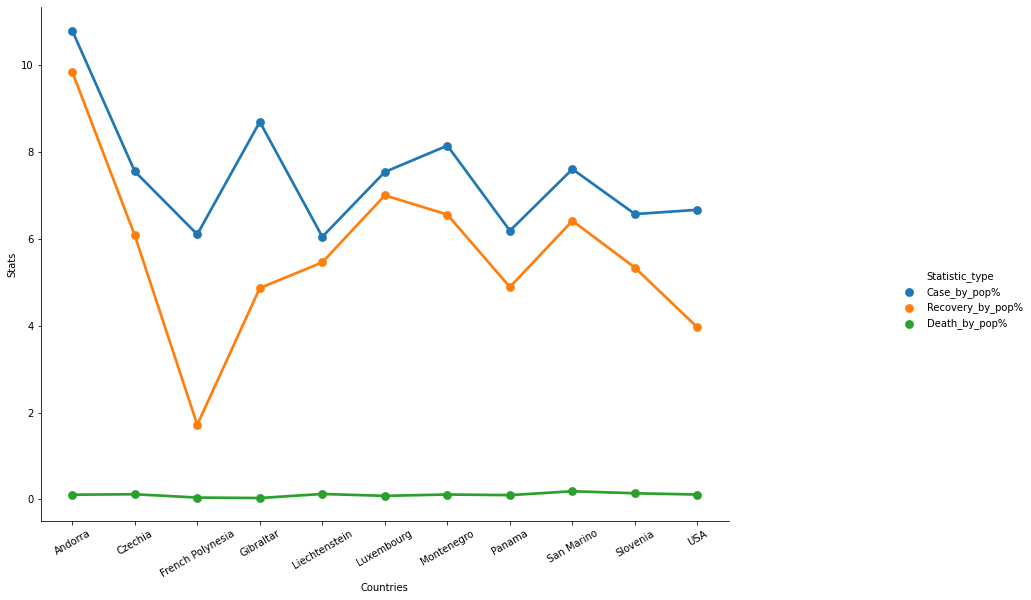

In [706]:
g = sns.factorplot(x="Countries", y = 'Stats', hue="Statistic_type", data = Immunity_top10)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=30)

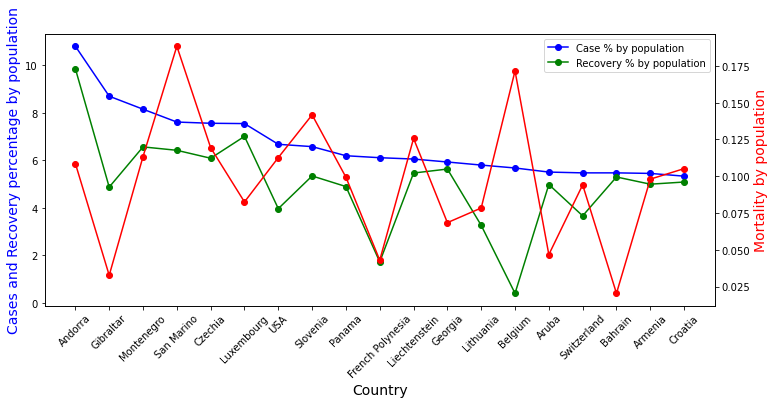

In [728]:
# create figure and axis objects with subplots()
g1 = Immunity.loc[Immunity['Case_by_pop%'] > 5.0]
fig,ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,5)
plt.xticks(rotation=45)
# make a plot
s1 = ax.plot(g1['Countries'], g1['Case_by_pop%'], color="blue", label = 'Case % by population', marker="o")
s2 = ax.plot(g1['Countries'], g1['Recovery_by_pop%'], color="green", label = 'Recovery % by population', marker="o")
plt.legend()
# set x-axis label
ax.set_xlabel("Country",fontsize=14)
# set y-axis label
ax.set_ylabel("Cases and Recovery percentage by population", color='blue', fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
s3 = ax2.plot(g1['Countries'], g1["Death_by_pop%"], color = "red", label = 'Death % by population', marker = "o")
ax2.set_ylabel("Mortality by population",color="red",fontsize=14)
plt.show()

Text(0.5, 0.98, 'Cases-Recovery-Death percentages by country population - top ten in cases ')

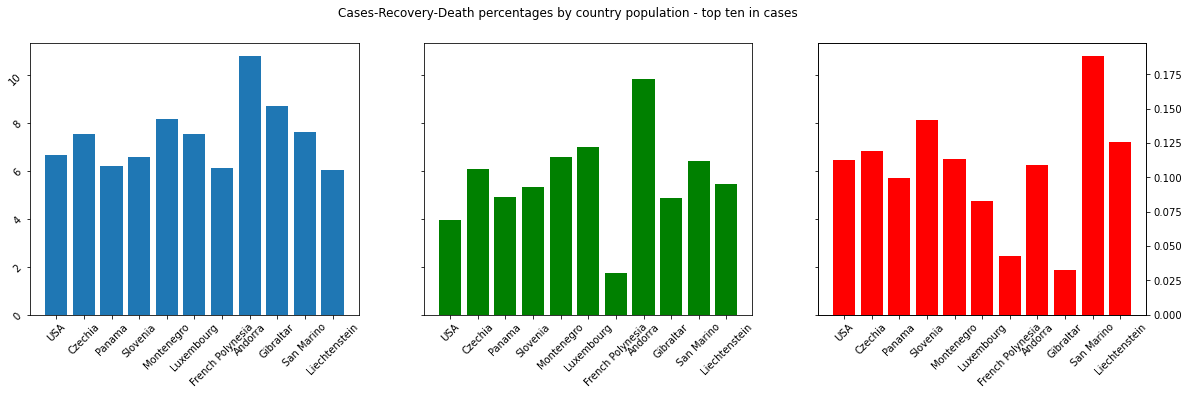

In [747]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
axs[0].bar(df1.loc[df1['Case_by_pop%'] > 6.0]['Countries'], df1.loc[df1['Case_by_pop%'] > 6.0]['Case_by_pop%'])
axs[0].tick_params(labelrotation=45)
axs[1].bar(df1.loc[df1['Case_by_pop%'] > 6.0]['Countries'], df1.loc[df1['Case_by_pop%'] > 6.0]['Recovery_by_pop%'], color = 'green')
axs[1].tick_params(labelrotation=45)
ax2 = axs[2].twinx()
ax2.bar(df1.loc[df1['Case_by_pop%'] > 6.0]['Countries'], df1.loc[df1['Case_by_pop%'] > 6.0]['Death_by_pop%'], color = 'red')
axs[2].tick_params(labelrotation=45)
fig.suptitle('Cases-Recovery-Death percentages by country population - top ten in cases ')

# Death, recovery and case percentages for top 10 countries based on total case percentage by population

In [759]:
Mortality.loc[Mortality['Death_by_pop%'] > 0.1]

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%
159,San Marino,2583,<NA>,64,<NA>,2179,340,10,76042,1884,27992,824070,33968,7.604216,0.188413,6.414861
22,Belgium,658655,2923,19936,53,45744,592975,405,56703,1716,7166986,616997,11615913,5.670282,0.171627,0.393805
64,Slovenia,136590,2045,2947,25,110925,22718,191,65697,1417,708811,340924,2079087,6.569711,0.141745,5.335275
72,Bosnia and Herzegovina,113392,<NA>,4211,<NA>,79465,29716,<NA>,34675,1288,524907,160517,3270109,3.467530,0.128772,2.430041
7,Italy,2220361,<NA>,77291,<NA>,1572015,571055,2587,36752,1279,27439249,454177,60415307,3.675163,0.127933,2.602014
162,Liechtenstein,2309,<NA>,48,<NA>,2084,177,18,60469,1257,21443,561556,38185,6.046877,0.125704,5.457640
79,North Macedonia,85494,<NA>,2581,<NA>,66209,16704,138,41037,1239,411040,197300,2083329,4.103721,0.123888,3.178039
19,Czechia,809601,14780,12800,98,651814,144987,1093,75527,1194,4001781,373323,10719354,7.552703,0.119410,6.080721
47,Bulgaria,207259,<NA>,8017,<NA>,130191,69051,377,29947,1158,1205134,174128,6920971,2.994652,0.115836,1.881109
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770,4.244666,0.115331,2.004974


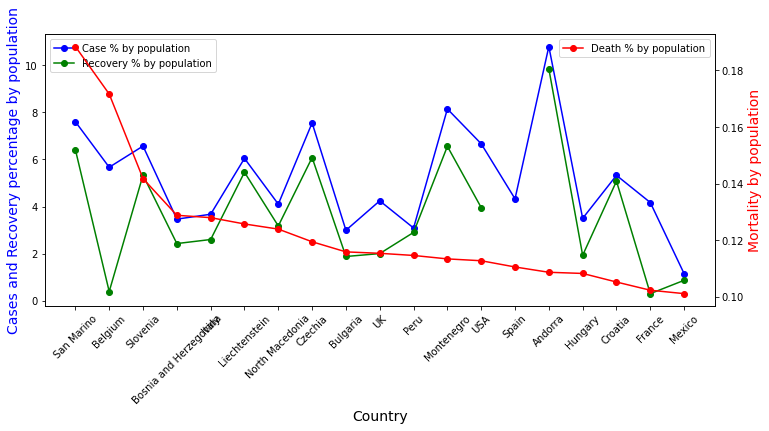

In [763]:
# create figure and axis objects with subplots()
g2 = Mortality.loc[Mortality['Death_by_pop%'] > 0.1]
fig,ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,5)
plt.xticks(rotation=45)
# make a plot
ax.plot(g2['Countries'], g2['Case_by_pop%'], color="blue", label = 'Case % by population', marker="o")
ax.plot(g2['Countries'], g2['Recovery_by_pop%'], color="green", label = 'Recovery % by population', marker="o")
plt.legend()
# set x-axis label
ax.set_xlabel("Country",fontsize=14)
# set y-axis label
ax.set_ylabel("Cases and Recovery percentage by population", color='blue', fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(g2['Countries'], g2["Death_by_pop%"], color = "red", label = 'Death % by population', marker = "o")
plt.legend()
ax2.set_ylabel("Mortality by population",color="red",fontsize=14)
plt.show()
#Country Case-Recovery-Death percentage statistics based on top ten countries with highest mortality percents

Text(0.5, 0.98, 'Cases-Recovery-Death percentages by country population - top ten countries in Mortality')

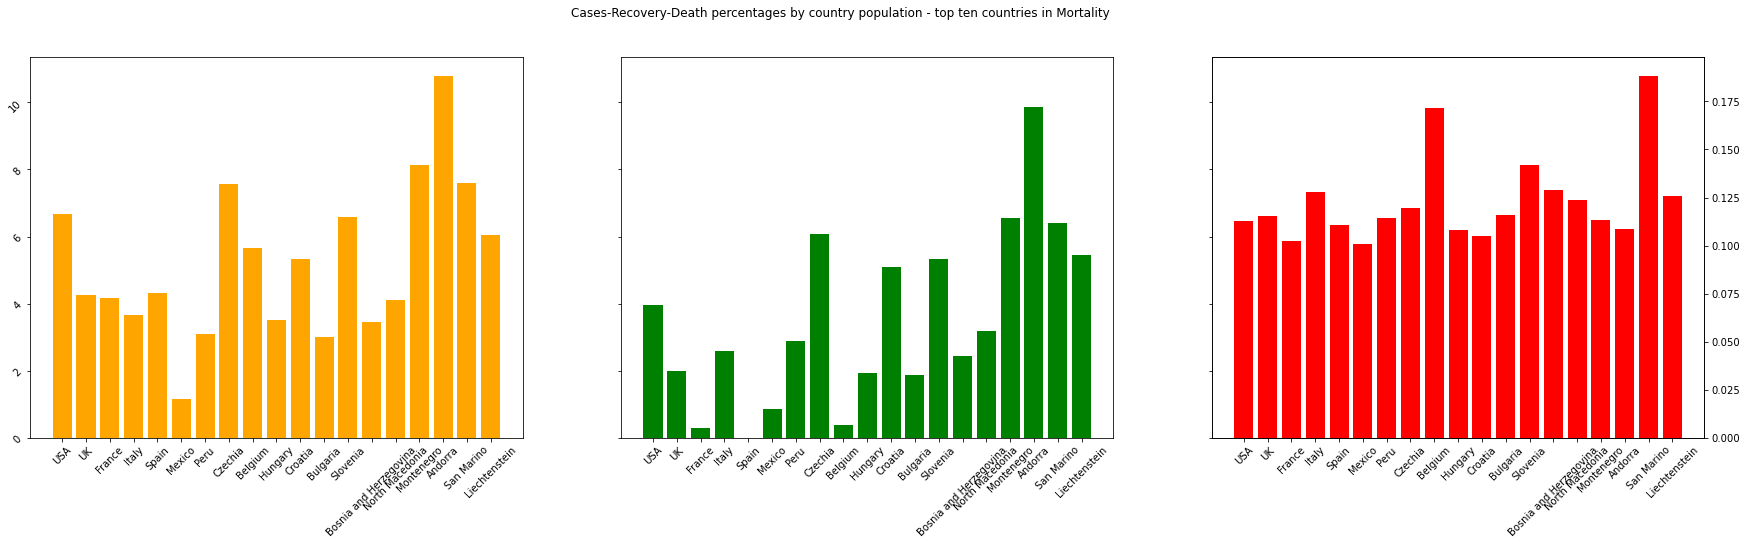

In [774]:
fig, axs = plt.subplots(1, 3, figsize=(30, 7), sharey=True)
axs[0].bar(df1.loc[df1['Death_by_pop%'] > 0.1]['Countries'], df1.loc[df1['Death_by_pop%'] > 0.1]['Case_by_pop%'], color = 'orange')
axs[0].tick_params(labelrotation=45)
axs[1].bar(df1.loc[df1['Death_by_pop%'] > 0.1]['Countries'], df1.loc[df1['Death_by_pop%'] > 0.1]['Recovery_by_pop%'], color = 'green')
axs[1].tick_params(labelrotation=45)
ax2 = axs[2].twinx()
ax2.bar(df1.loc[df1['Death_by_pop%'] > 0.1]['Countries'], df1.loc[df1['Death_by_pop%'] > 0.1]['Death_by_pop%'], color = 'red')
axs[2].tick_params(labelrotation=45)
fig.suptitle('Cases-Recovery-Death percentages by country population - top ten countries in Mortality')

In [778]:
Recovery.loc[Recovery['Recovery_by_pop%'] > 5.0]

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%
131,Andorra,8348,<NA>,84,<NA>,7615,649,15,107953,1086,180088,2328825,77330,10.795293,0.108625,9.847407
91,Luxembourg,47592,<NA>,521,<NA>,44187,2884,26,75394,825,1716089,2718596,631241,7.539434,0.082536,7.000021
88,Montenegro,51160,<NA>,712,<NA>,41191,9257,68,81451,1134,191516,304909,628108,8.145096,0.113356,6.557949
159,San Marino,2583,<NA>,64,<NA>,2179,340,10,76042,1884,27992,824070,33968,7.604216,0.188413,6.414861
19,Czechia,809601,14780,12800,98,651814,144987,1093,75527,1194,4001781,373323,10719354,7.552703,0.119410,6.080721
41,Georgia,236028,537,2728,34,224189,9111,<NA>,59227,685,2005244,503178,3985159,5.922675,0.068454,5.625597
162,Liechtenstein,2309,<NA>,48,<NA>,2084,177,18,60469,1257,21443,561556,38185,6.046877,0.125704,5.457640
64,Slovenia,136590,2045,2947,25,110925,22718,191,65697,1417,708811,340924,2079087,6.569711,0.141745,5.335275
78,Bahrain,94633,<NA>,353,<NA>,91630,2650,12,54648,204,2439685,1408841,1731697,5.464755,0.020385,5.291341
45,Croatia,217946,1098,4304,38,207848,5794,194,53262,1052,1061953,259521,4091981,5.326173,0.105181,5.079398


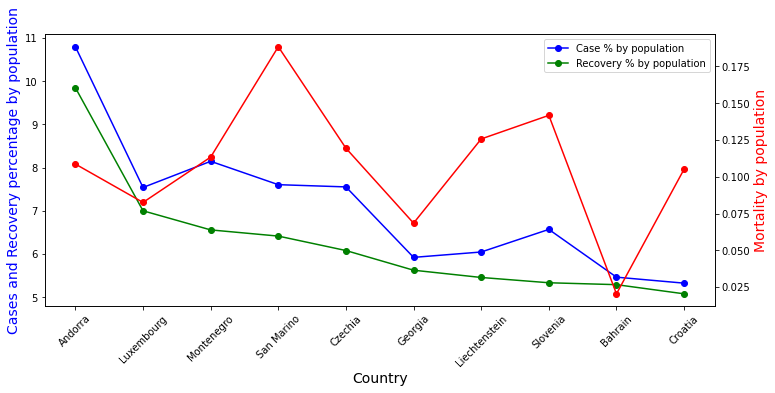

In [780]:
# create figure and axis objects with subplots()
g3 = Recovery.loc[Recovery['Recovery_by_pop%'] > 5.0]
fig,ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,5)
plt.xticks(rotation=45)
# make a plot
ax.plot(g3['Countries'], g3['Case_by_pop%'], color="blue", label = 'Case % by population', marker="o")
ax.plot(g3['Countries'], g3['Recovery_by_pop%'], color="green", label = 'Recovery % by population', marker="o")
plt.legend()
# set x-axis label
ax.set_xlabel("Country",fontsize=14)
# set y-axis label
ax.set_ylabel("Cases and Recovery percentage by population", color='blue', fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(g3['Countries'], g3["Death_by_pop%"], color = "red", label = 'Death % by population', marker = "o")
ax2.set_ylabel("Mortality by population",color="red",fontsize=14)
plt.show()
#Country Case-Recovery-Death percentage statistics based on countries with highest recovery percents

Text(0.5, 0.98, 'Cases-Recovery-Death percentages by country population - top ten countries in Recovery')

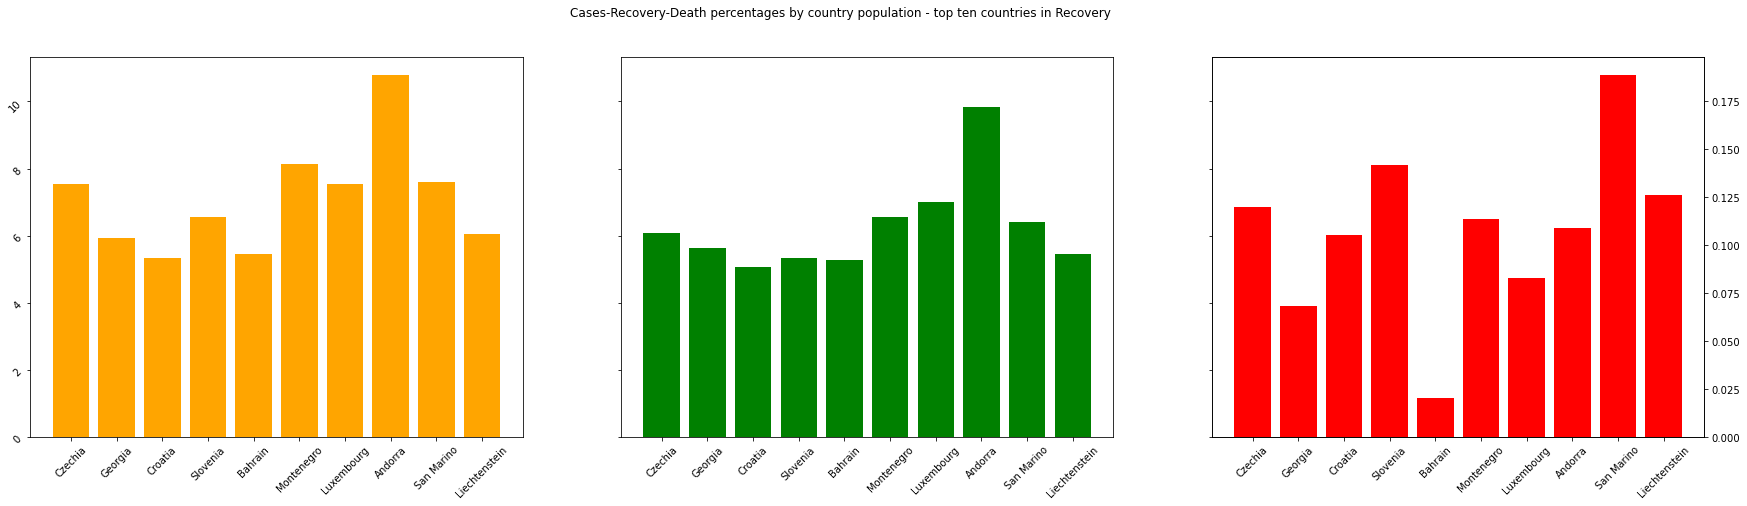

In [781]:
fig, axs = plt.subplots(1, 3, figsize=(30, 7), sharey=True)
axs[0].bar(df1.loc[df1['Recovery_by_pop%'] > 5.0]['Countries'], df1.loc[df1['Recovery_by_pop%'] > 5.0]['Case_by_pop%'], color = 'orange')
axs[0].tick_params(labelrotation=45)
axs[1].bar(df1.loc[df1['Recovery_by_pop%'] > 5.0]['Countries'], df1.loc[df1['Recovery_by_pop%'] > 5.0]['Recovery_by_pop%'], color = 'green')
axs[1].tick_params(labelrotation=45)
ax2 = axs[2].twinx()
ax2.bar(df1.loc[df1['Recovery_by_pop%'] > 5.0]['Countries'], df1.loc[df1['Recovery_by_pop%'] > 5.0]['Death_by_pop%'], color = 'red')
axs[2].tick_params(labelrotation=45)
fig.suptitle('Cases-Recovery-Death percentages by country population - top ten countries in Recovery')

In [796]:
df1['Test_percentage'] = (df1['Total_tests']/df1['Total_population'])*100

In [827]:
df1['Death_bycases_percentage'] = (df1['Total_deaths']/df1['Total_cases'])*100

In [1015]:
df1

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%,Test_percentage,Death_bycases_percentage
0,USA,22137009,<NA>,374197,<NA>,13143317,8619495,29034,66675,1127,265444863,799501,332013304,6.667507,0.112705,3.958672,79.950068,1.690368
1,India,10414044,<NA>,150606,<NA>,10037398,226040,8944,7508,109,179336364,129293,1387049203,0.750806,0.010858,0.723651,12.929344,1.446182
2,Brazil,7961673,<NA>,200498,<NA>,7096931,664244,8318,37318,940,28600000,134055,213345480,3.731822,0.093978,3.326497,13.405487,2.518290
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164,2.299006,0.041729,1.871057,63.644451,1.815099
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770,4.244666,0.115331,2.004974,85.544610,2.717086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880,0.001653,0.000165,0.001323,NaN,10.000000
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398,0.006734,NaN,0.006734,NaN,NaN
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135,0.035923,NaN,0.008981,10.318815,NaN
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100,0.001005,NaN,0.001005,NaN,NaN


In [1016]:
df1['Recovery_bycases_percentage'] = (df1['Total_recovered']/df1['Total_cases'])*100

In [844]:
Case_Mortality = df1.sort_values(by = ['Death_bycases_percentage'], ascending = False)

In [848]:
dfs = np.array_split(df1, 10)

In [1028]:
dfs[9].shape

(21, 18)

<AxesSubplot:xlabel='Countries'>

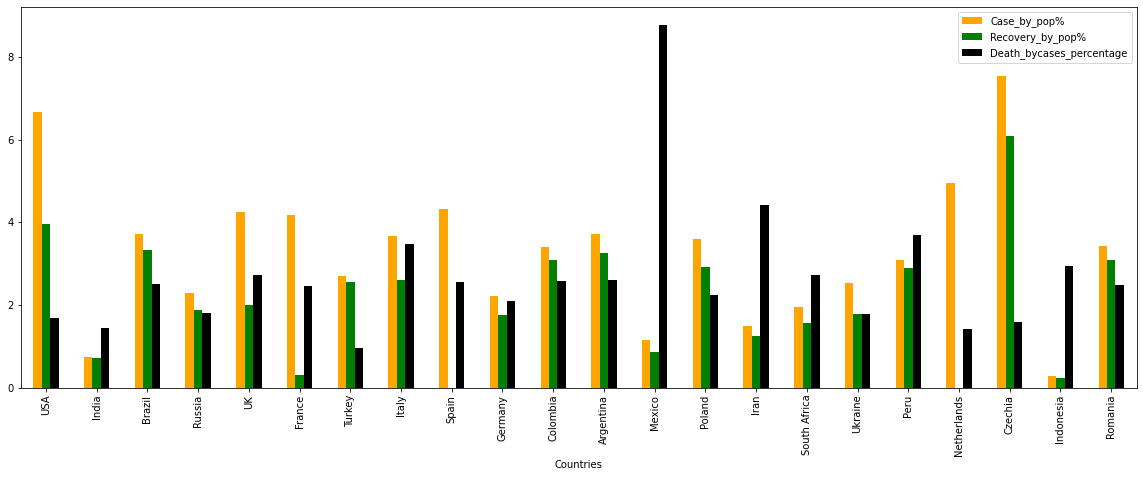

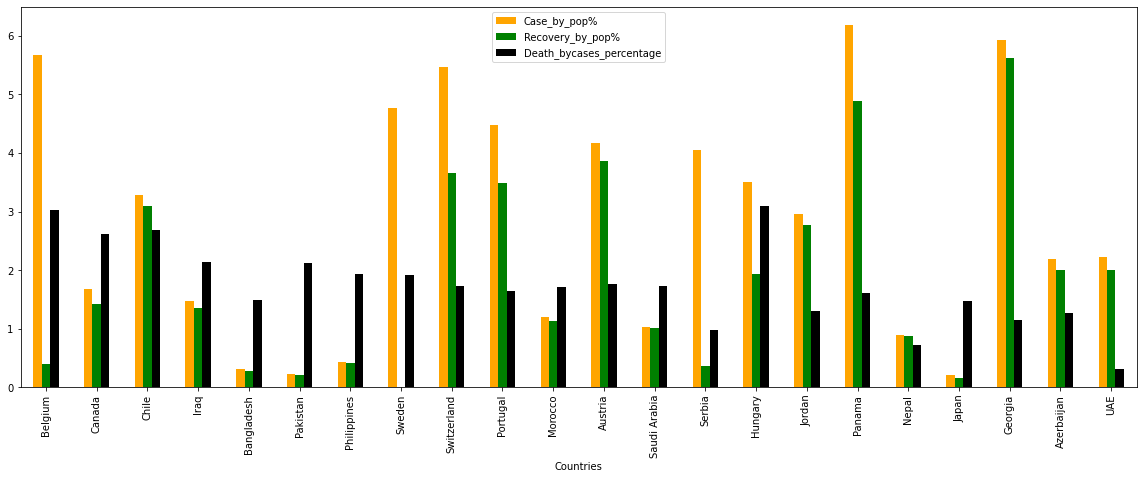

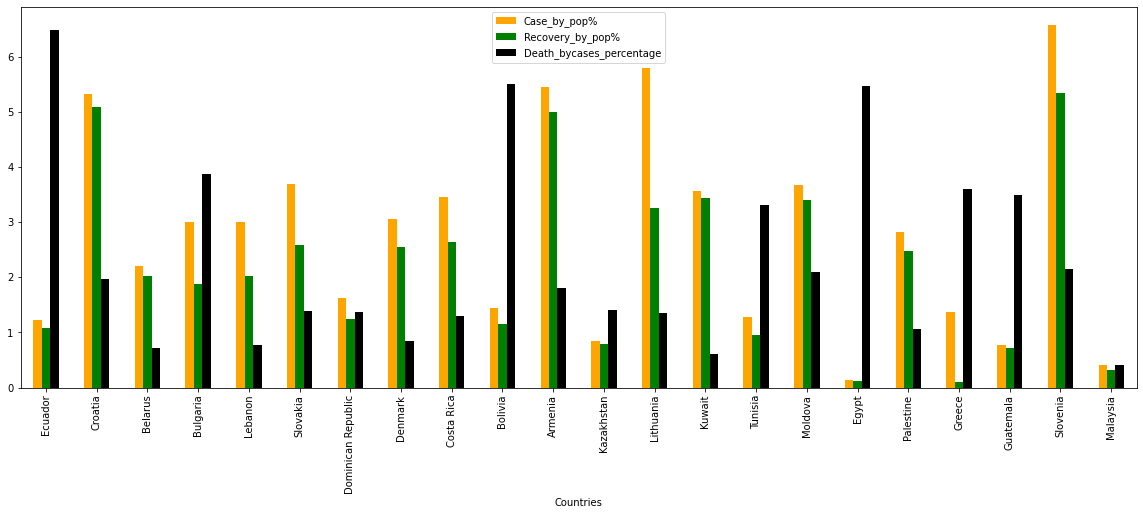

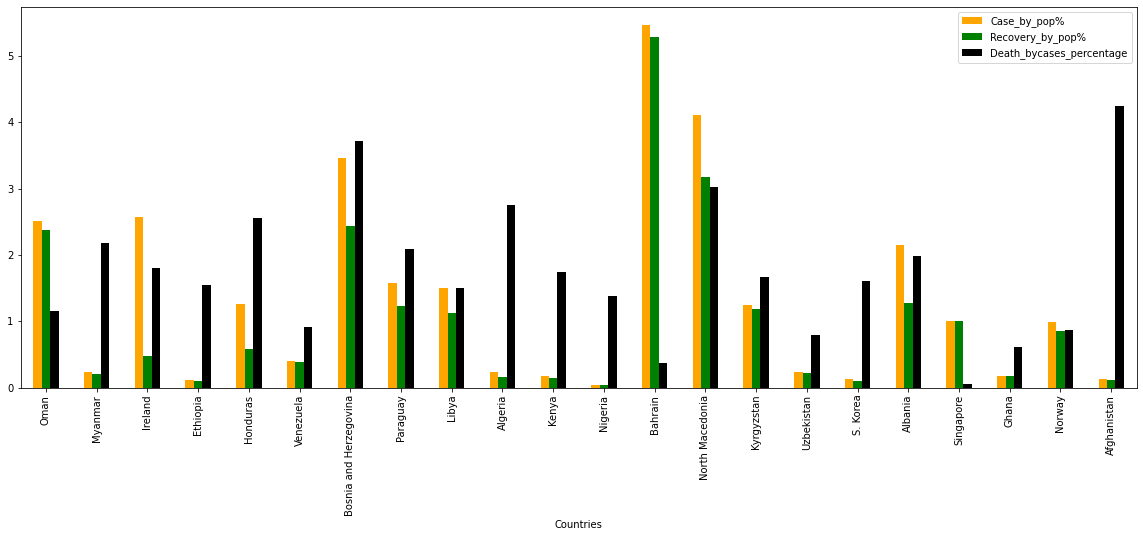

In [852]:
dfs[0].plot('Countries',[13,15,17],kind = 'bar', color=("orange","green","black"),figsize=(20,7))
dfs[1].plot('Countries',[13,15,17],kind = 'bar', color=("orange","green","black"),figsize=(20,7))
dfs[2].plot('Countries',[13,15,17],kind = 'bar', color=("orange","green","black"),figsize=(20,7))
dfs[3].plot('Countries',[13,15,17],kind = 'bar', color=("orange","green","black"),figsize=(20,7))

#Cases-Recovery-Death by cases comparison for all countries

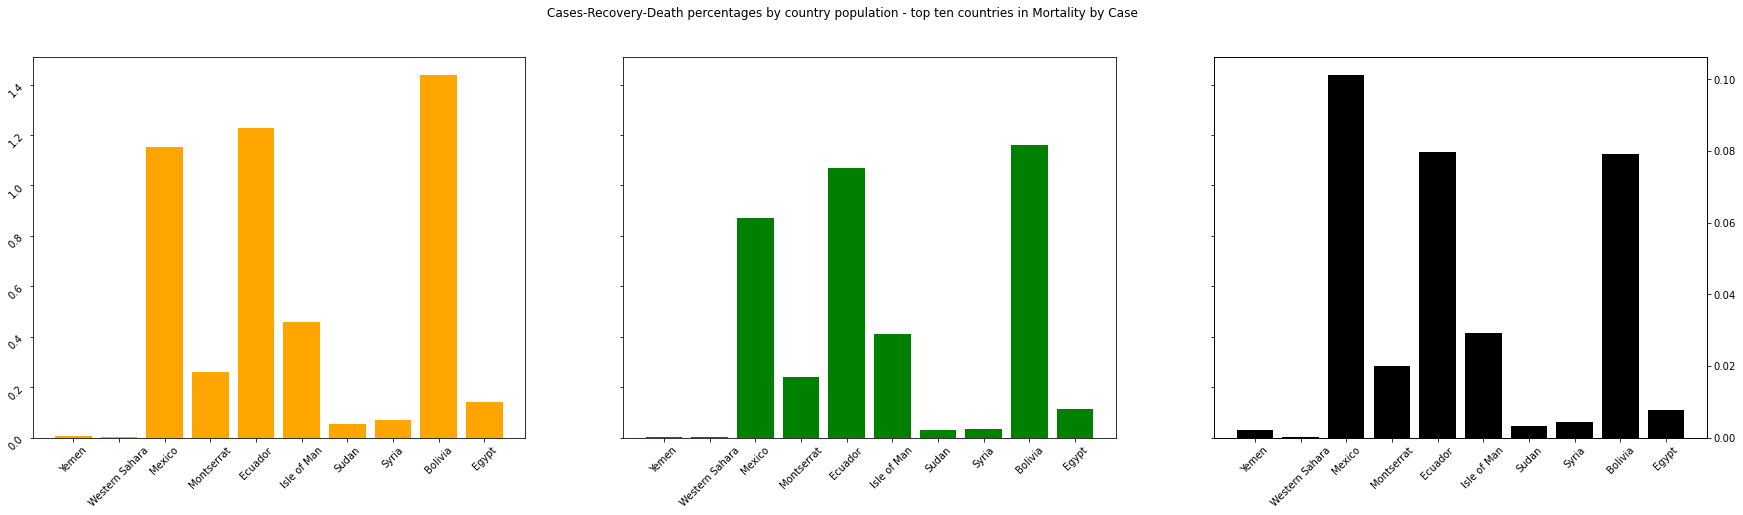

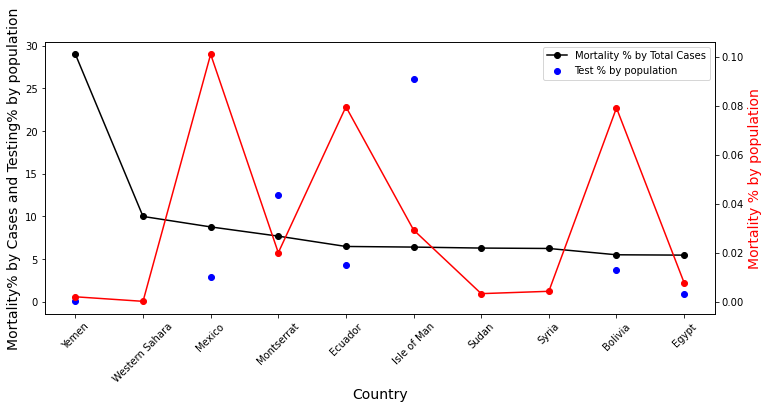

In [863]:
fig, axs = plt.subplots(1, 3, figsize=(30, 7), sharey=True)
axs[0].bar(Case_Mortality.head(10)['Countries'], Case_Mortality.head(10)['Case_by_pop%'], color = 'orange')
axs[0].tick_params(labelrotation=45)
axs[1].bar(Case_Mortality.head(10)['Countries'], Case_Mortality.head(10)['Recovery_by_pop%'], color = 'green')
axs[1].tick_params(labelrotation=45)
ax2 = axs[2].twinx()
ax2.bar(Case_Mortality.head(10)['Countries'], Case_Mortality.head(10)['Death_by_pop%'], color = 'black')
axs[2].tick_params(labelrotation=45)
fig.suptitle('Cases-Recovery-Death percentages by country population - top ten countries in Mortality by Case')

# create figure and axis objects with subplots()
g4 = Case_Mortality.head(10)
fig,ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,5)
plt.xticks(rotation=45)

ax.scatter(g4['Countries'], g4['Test_percentage'], color="blue", label = 'Test % by population', marker="o")
ax.plot(g4['Countries'], g4['Death_bycases_percentage'], color="black", label = 'Mortality % by Total Cases', marker="o")
plt.legend()

ax.set_xlabel("Country",fontsize=14)

ax.set_ylabel("Mortality% by Cases and Testing% by population", color='black', fontsize=14)

ax2=ax.twinx()

ax2.plot(g4['Countries'], g4["Death_by_pop%"], color = "red", label = 'Death % by population', marker = "o")
ax2.set_ylabel("Mortality % by population",color="red",fontsize=14)
plt.show()
# All stats for countries with high mortality by infected cases
# Case-Recovery-Death percentages by population with scaled axes
# Testing and mortality percentages by population and infected cases respectively

In [860]:
Case_Mortality

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%,Test_percentage,Death_bycases_percentage
163,Yemen,2104,<NA>,610,<NA>,1405,89,23,70,20,17404,577,30163934,0.006975,0.002022,0.004658,0.057698,28.992395
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880,0.001653,0.000165,0.001323,NaN,10.000000
12,Mexico,1493569,13734,131031,1044,1127471,235067,3913,11521,1011,3781625,29171,129635780,1.152127,0.101076,0.869722,2.917115,8.773013
208,Montserrat,13,<NA>,1,<NA>,12,0,<NA>,2603,200,626,125350,4994,0.260312,0.020024,0.240288,12.535042,7.692308
44,Ecuador,218385,<NA>,14158,<NA>,190350,13877,382,12282,796,767133,43142,17781616,1.228150,0.079622,1.070488,4.314192,6.483046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Anguilla,15,<NA>,<NA>,<NA>,13,2,<NA>,995,<NA>,5337,354077,15073,0.099516,NaN,0.086247,35.407683,NaN
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398,0.006734,NaN,0.006734,NaN,NaN
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135,0.035923,NaN,0.008981,10.318815,NaN
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100,0.001005,NaN,0.001005,NaN,NaN


In [831]:
corr = df1.corr()

In [832]:
corr

,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%,Test_percentage,Death_bycases_percentage
Total_cases,1.000000,0.921390,0.955183,0.685160,0.970518,0.872717,0.971068,0.223924,0.264478,0.943887,0.036664,0.596725,0.223924,0.264448,0.164880,0.036664,0.005359
New_cases,0.921390,1.000000,0.734511,0.718851,0.913577,0.714731,0.748440,0.273016,0.341386,0.728556,-0.005355,0.441244,0.273019,0.341670,0.252748,-0.005355,0.300959
Total_deaths,0.955183,0.734511,1.000000,0.982374,0.927839,0.827156,0.947922,0.221599,0.350430,0.856652,0.017798,0.532270,0.221599,0.350376,0.157382,0.017798,0.076836
New_deaths,0.685160,0.718851,0.982374,1.000000,0.666544,0.486839,0.880952,-0.018509,0.257139,0.368541,-0.080288,0.385456,-0.018506,0.257054,-0.016882,-0.080288,0.670674
Total_recovered,0.970518,0.913577,0.927839,0.666544,1.000000,0.729374,0.918695,0.192163,0.231432,0.921405,0.014017,0.719004,0.192163,0.231401,0.169506,0.014017,0.003200
Active_cases,0.872717,0.714731,0.827156,0.486839,0.729374,1.000000,0.891915,0.234681,0.263821,0.814643,0.070855,0.241863,0.234681,0.263799,0.124054,0.070854,0.003593
Serious_critical,0.971068,0.748440,0.947922,0.880952,0.918695,0.891915,1.000000,0.183548,0.257700,0.894370,0.011325,0.499467,0.183548,0.257635,0.130254,0.011325,0.032345
Per_1m_cases,0.223924,0.273016,0.221599,-0.018509,0.192163,0.234681,0.183548,1.000000,0.801119,0.171118,0.442784,-0.041393,1.000000,0.801228,0.933334,0.442784,-0.133343
Deaths_1m,0.264478,0.341386,0.350430,0.257139,0.231432,0.263821,0.257700,0.801119,1.000000,0.183577,0.156255,-0.010875,0.801119,0.999996,0.722024,0.156255,0.090959
Total_tests,0.943887,0.728556,0.856652,0.368541,0.921405,0.814643,0.894370,0.171118,0.183577,1.000000,0.076108,0.680548,0.171118,0.183581,0.108972,0.076108,-0.008592


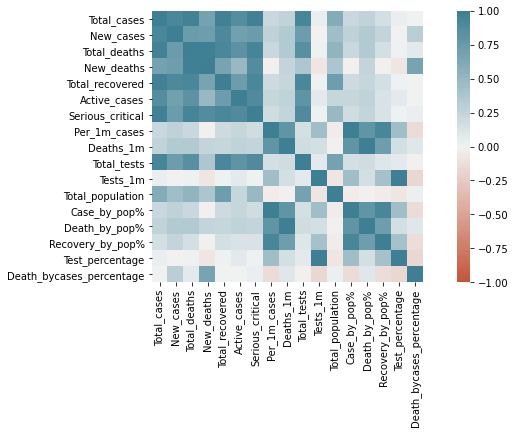

In [833]:
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

In [869]:
import ipywidgets as widgets
from ipywidgets import interactive

In [881]:
from IPython.display import display

In [988]:
from ipywidgets import interact, interact_manual

In [887]:
# def view2(x = '', y = 25):
#     if x=='All': 
#         return df1.head(y)
#     else:
#         return df1[df1['Countries']==x].head(y)

# a_slider = widgets.IntSlider(min=0, max=214, step=1, value=214)
# b_select =  widgets.Select(options=items)
# #widgets.interactive(view2,y=a_slider,x=b_select)
# display(view2,a_slider,b_select)

<function __main__.view2(x='', y=25)>

IntSlider(value=214, max=214)

Select(options=('All', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barb…

In [888]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [938]:
dropdown_country = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df1.Countries))
dropdown_columns = widgets.Dropdown(options = df1.columns[12:18])
a_slider = widgets.IntSlider(min = df1.Total_population.min(), max = df1.Total_population.max(), step = 500000, value=500000)

output_country = widgets.Output()

def dropdown_country_eventhandler(change):
    output_country.clear_output()
    with output_country:
        if (change.new == ALL):
            display(df1)
            display(dropdown_columns)
            if (change.new == Total_population):
                display(a_slider)
        else:
            display(df1[df1['Countries'] == change.new])
        
dropdown_country.observe(dropdown_country_eventhandler, names='value')
display(dropdown_country)

Dropdown(options=('ALL', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Ba…

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%,Test_percentage,Death_bycases_percentage
0,USA,22137009,<NA>,374197,<NA>,13143317,8619495,29034,66675,1127,265444863,799501,332013304,6.667507,0.112705,3.958672,79.950068,1.690368
1,India,10414044,<NA>,150606,<NA>,10037398,226040,8944,7508,109,179336364,129293,1387049203,0.750806,0.010858,0.723651,12.929344,1.446182
2,Brazil,7961673,<NA>,200498,<NA>,7096931,664244,8318,37318,940,28600000,134055,213345480,3.731822,0.093978,3.326497,13.405487,2.518290
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164,2.299006,0.041729,1.871057,63.644451,1.815099
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770,4.244666,0.115331,2.004974,85.544610,2.717086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880,0.001653,0.000165,0.001323,NaN,10.000000
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398,0.006734,NaN,0.006734,NaN,NaN
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135,0.035923,NaN,0.008981,10.318815,NaN
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100,0.001005,NaN,0.001005,NaN,NaN


Dropdown(options=('Total_population', 'Case_by_pop%', 'Death_by_pop%', 'Recovery_by_pop%', 'Test_percentage', …

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%,Test_percentage,Death_bycases_percentage
0,USA,22137009,<NA>,374197,<NA>,13143317,8619495,29034,66675,1127,265444863,799501,332013304,6.667507,0.112705,3.958672,79.950068,1.690368
1,India,10414044,<NA>,150606,<NA>,10037398,226040,8944,7508,109,179336364,129293,1387049203,0.750806,0.010858,0.723651,12.929344,1.446182
2,Brazil,7961673,<NA>,200498,<NA>,7096931,664244,8318,37318,940,28600000,134055,213345480,3.731822,0.093978,3.326497,13.405487,2.518290
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164,2.299006,0.041729,1.871057,63.644451,1.815099
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770,4.244666,0.115331,2.004974,85.544610,2.717086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880,0.001653,0.000165,0.001323,NaN,10.000000
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398,0.006734,NaN,0.006734,NaN,NaN
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135,0.035923,NaN,0.008981,10.318815,NaN
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100,0.001005,NaN,0.001005,NaN,NaN


Dropdown(options=('Total_population', 'Case_by_pop%', 'Death_by_pop%', 'Recovery_by_pop%', 'Test_percentage', …

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%,Test_percentage,Death_bycases_percentage
0,USA,22137009,<NA>,374197,<NA>,13143317,8619495,29034,66675,1127,265444863,799501,332013304,6.667507,0.112705,3.958672,79.950068,1.690368
1,India,10414044,<NA>,150606,<NA>,10037398,226040,8944,7508,109,179336364,129293,1387049203,0.750806,0.010858,0.723651,12.929344,1.446182
2,Brazil,7961673,<NA>,200498,<NA>,7096931,664244,8318,37318,940,28600000,134055,213345480,3.731822,0.093978,3.326497,13.405487,2.518290
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164,2.299006,0.041729,1.871057,63.644451,1.815099
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770,4.244666,0.115331,2.004974,85.544610,2.717086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880,0.001653,0.000165,0.001323,NaN,10.000000
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398,0.006734,NaN,0.006734,NaN,NaN
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135,0.035923,NaN,0.008981,10.318815,NaN
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100,0.001005,NaN,0.001005,NaN,NaN


Dropdown(options=('Total_population', 'Case_by_pop%', 'Death_by_pop%', 'Recovery_by_pop%', 'Test_percentage', …

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%,Test_percentage,Death_bycases_percentage
0,USA,22137009,<NA>,374197,<NA>,13143317,8619495,29034,66675,1127,265444863,799501,332013304,6.667507,0.112705,3.958672,79.950068,1.690368
1,India,10414044,<NA>,150606,<NA>,10037398,226040,8944,7508,109,179336364,129293,1387049203,0.750806,0.010858,0.723651,12.929344,1.446182
2,Brazil,7961673,<NA>,200498,<NA>,7096931,664244,8318,37318,940,28600000,134055,213345480,3.731822,0.093978,3.326497,13.405487,2.518290
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164,2.299006,0.041729,1.871057,63.644451,1.815099
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770,4.244666,0.115331,2.004974,85.544610,2.717086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880,0.001653,0.000165,0.001323,NaN,10.000000
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398,0.006734,NaN,0.006734,NaN,NaN
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135,0.035923,NaN,0.008981,10.318815,NaN
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100,0.001005,NaN,0.001005,NaN,NaN


Dropdown(options=('Total_population', 'Case_by_pop%', 'Death_by_pop%', 'Recovery_by_pop%', 'Test_percentage', …

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%,Test_percentage,Death_bycases_percentage
0,USA,22137009,<NA>,374197,<NA>,13143317,8619495,29034,66675,1127,265444863,799501,332013304,6.667507,0.112705,3.958672,79.950068,1.690368
1,India,10414044,<NA>,150606,<NA>,10037398,226040,8944,7508,109,179336364,129293,1387049203,0.750806,0.010858,0.723651,12.929344,1.446182
2,Brazil,7961673,<NA>,200498,<NA>,7096931,664244,8318,37318,940,28600000,134055,213345480,3.731822,0.093978,3.326497,13.405487,2.518290
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164,2.299006,0.041729,1.871057,63.644451,1.815099
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770,4.244666,0.115331,2.004974,85.544610,2.717086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880,0.001653,0.000165,0.001323,NaN,10.000000
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398,0.006734,NaN,0.006734,NaN,NaN
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135,0.035923,NaN,0.008981,10.318815,NaN
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100,0.001005,NaN,0.001005,NaN,NaN


Dropdown(options=('Total_population', 'Case_by_pop%', 'Death_by_pop%', 'Recovery_by_pop%', 'Test_percentage', …

,Countries,Total_cases,New_cases,Total_deaths,New_deaths,Total_recovered,Active_cases,Serious_critical,Per_1m_cases,Deaths_1m,Total_tests,Tests_1m,Total_population,Case_by_pop%,Death_by_pop%,Recovery_by_pop%,Test_percentage,Death_bycases_percentage
0,USA,22137009,<NA>,374197,<NA>,13143317,8619495,29034,66675,1127,265444863,799501,332013304,6.667507,0.112705,3.958672,79.950068,1.690368
1,India,10414044,<NA>,150606,<NA>,10037398,226040,8944,7508,109,179336364,129293,1387049203,0.750806,0.010858,0.723651,12.929344,1.446182
2,Brazil,7961673,<NA>,200498,<NA>,7096931,664244,8318,37318,940,28600000,134055,213345480,3.731822,0.093978,3.326497,13.405487,2.518290
3,Russia,3355794,23652,60911,454,2731129,563754,2300,22990,417,92900000,636445,145967164,2.299006,0.041729,1.871057,63.644451,1.815099
4,UK,2889419,<NA>,78508,<NA>,1364821,1446090,2821,42447,1153,58231730,855446,68071770,4.244666,0.115331,2.004974,85.544610,2.717086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Western Sahara,10,<NA>,1,<NA>,8,1,<NA>,17,2,<NA>,<NA>,604880,0.001653,0.000165,0.001323,NaN,10.000000
210,Marshall Islands,4,<NA>,<NA>,<NA>,4,0,<NA>,67,<NA>,<NA>,<NA>,59398,0.006734,NaN,0.006734,NaN,NaN
211,Wallis and Futuna,4,<NA>,<NA>,<NA>,1,3,<NA>,359,<NA>,1149,103188,11135,0.035923,NaN,0.008981,10.318815,NaN
212,Samoa,2,<NA>,<NA>,<NA>,2,0,<NA>,10,<NA>,<NA>,<NA>,199100,0.001005,NaN,0.001005,NaN,NaN


Dropdown(options=('Total_population', 'Case_by_pop%', 'Death_by_pop%', 'Recovery_by_pop%', 'Test_percentage', …

NameError: name 'dropdown_year' is not defined

In [939]:
display(output_country)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '   Countries  Total_cases  New_cases  …

In [943]:
a_slider.value

548000802

In [983]:
output = widgets.Output()

dropdown_country = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df1.Countries))
dropdown_columns = widgets.Dropdown(options = df1.columns[12:18])
a_slider = widgets.IntSlider(min = df1.Total_population.min(), max = df1.Total_population.max(), step = 500000, value=500000)

@interact
def greater_than(column=['Total_population'], x=(column.min(), column.max(), 500000)):
    return df1.loc[df1[column] > x]

def common_filtering(country, change):
    output.clear_output()
    
    with output:
    
        if (country == ALL):
            display(df1, dropdown_columns)

            if (dropdown_columns == 'Total_population'):
                display(a_slider, df1.loc[df1['Total_population'] > a_slider.value])
        else:
            display(df1[df1['Countries'] == country])


#         display(common_filter)
        
def dropdown_country_eventhandler(change):
    common_filtering(change.new, dropdown_country.value)
def dropdown_columns_eventhandler(change):
    common_filtering(dropdown_columns.value, change.new)
def slider_population_eventhandler(change):
    common_filtering(a_slider.value, change.new)
    
dropdown_country.observe(dropdown_country_eventhandler, names='value')
dropdown_columns.observe(dropdown_columns_eventhandler, names='value')
a_slider.observe(slider_population_eventhandler, names = 'value')

display(dropdown_country)

        
# , case_percent, death_percent, recovery_percent, test_percent, death_bycase

Dropdown(options=('ALL', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Ba…

In [985]:
display(output)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '   Countries  Total_cases  New_cases  …

In [1014]:
@interact
def greater_than_population(column=df1.columns[12:18], 
                            P = (800, 1387049203, 500000), T = (0,500,0.5), D = (0,0.2,0.01), O = (0,30,0.5)):
    if column == 'Total_population':
        return df1.loc[df1[column] > P]
    elif column == 'Test_percentage':
        return df1.loc[df1[column] > T]
    elif column == 'Death_by_pop%':
        return df1.loc[df1[column] > D]
    else:
        return df1.loc[df1[column] > O]

interactive(children=(Dropdown(description='column', options=('Total_population', 'Case_by_pop%', 'Death_by_po…

In [1018]:
df1['Recovery_bycases_percentage'].max()

100.0

In [1022]:
df1.drop('Recovery_bycases_percentage',axis=1, inplace = True)

In [1023]:
dropdown_country = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df1.Countries))

output_country = widgets.Output()

def dropdown_country_eventhandler(change):
    output_country.clear_output()
    with output_country:
        if (change.new == ALL):
            @interact
            def greater_than_population(column=df1.columns[12:18], 
                                        P = (800, 1387049203, 500000), T = (0,500,0.5), D = (0,0.2,0.01), O = (0,30,0.5)):
                if column == 'Total_population':
                    return df1.loc[df1[column] > P]
                elif column == 'Test_percentage':
                    return df1.loc[df1[column] > T]
                elif column == 'Death_by_pop%':
                    return df1.loc[df1[column] > D]
                else:
                    return df1.loc[df1[column] > O]
        else:
            display(df1[df1['Countries'] == change.new])
        
dropdown_country.observe(dropdown_country_eventhandler, names='value')
display(dropdown_country)

Dropdown(options=('ALL', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Ba…

In [1024]:
display(output_country)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '   Countries  Total_cases  New_cases  …